# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

## Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

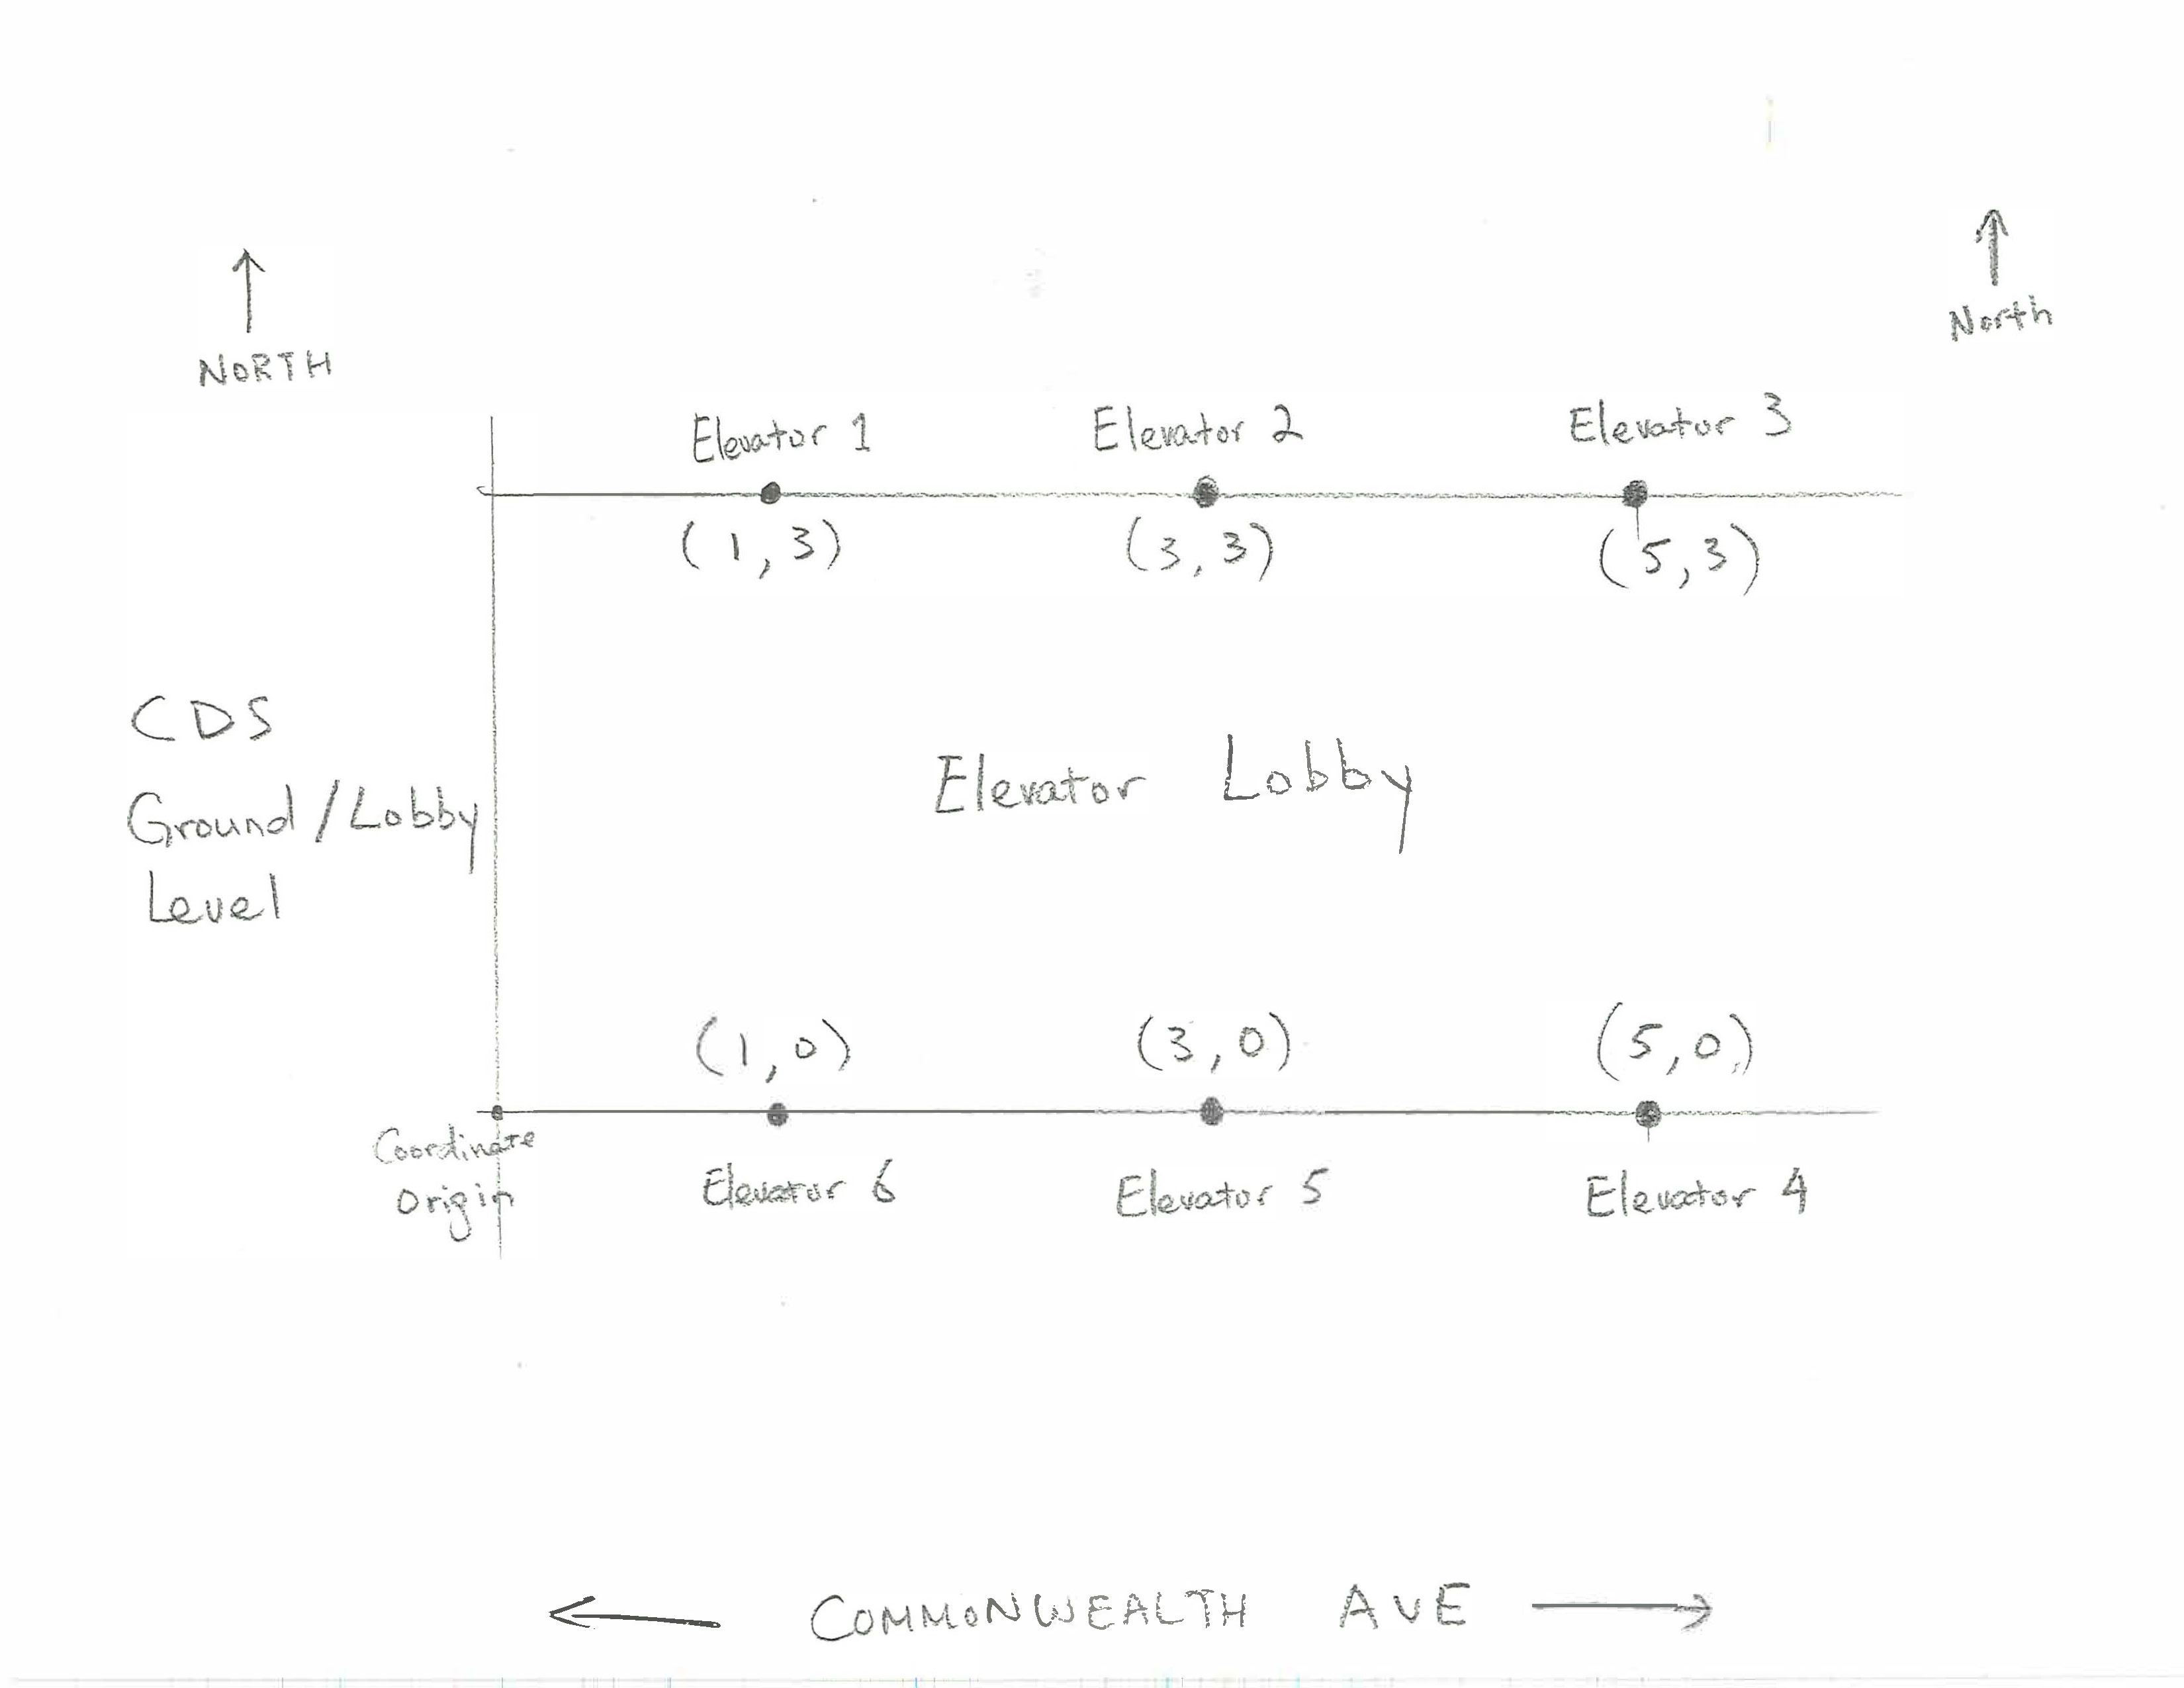

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:** 
According to the diagram above, it seems like the optimal point to stand and wait for the elevator would be point (3,1.5), since that's the closest to being equidistant from each elevator. While it is closer to elevators 2 and 5, that point has equal distance to the other four elevators, which has a better chance of minimizing the walking distance to the elevator that opens.

**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

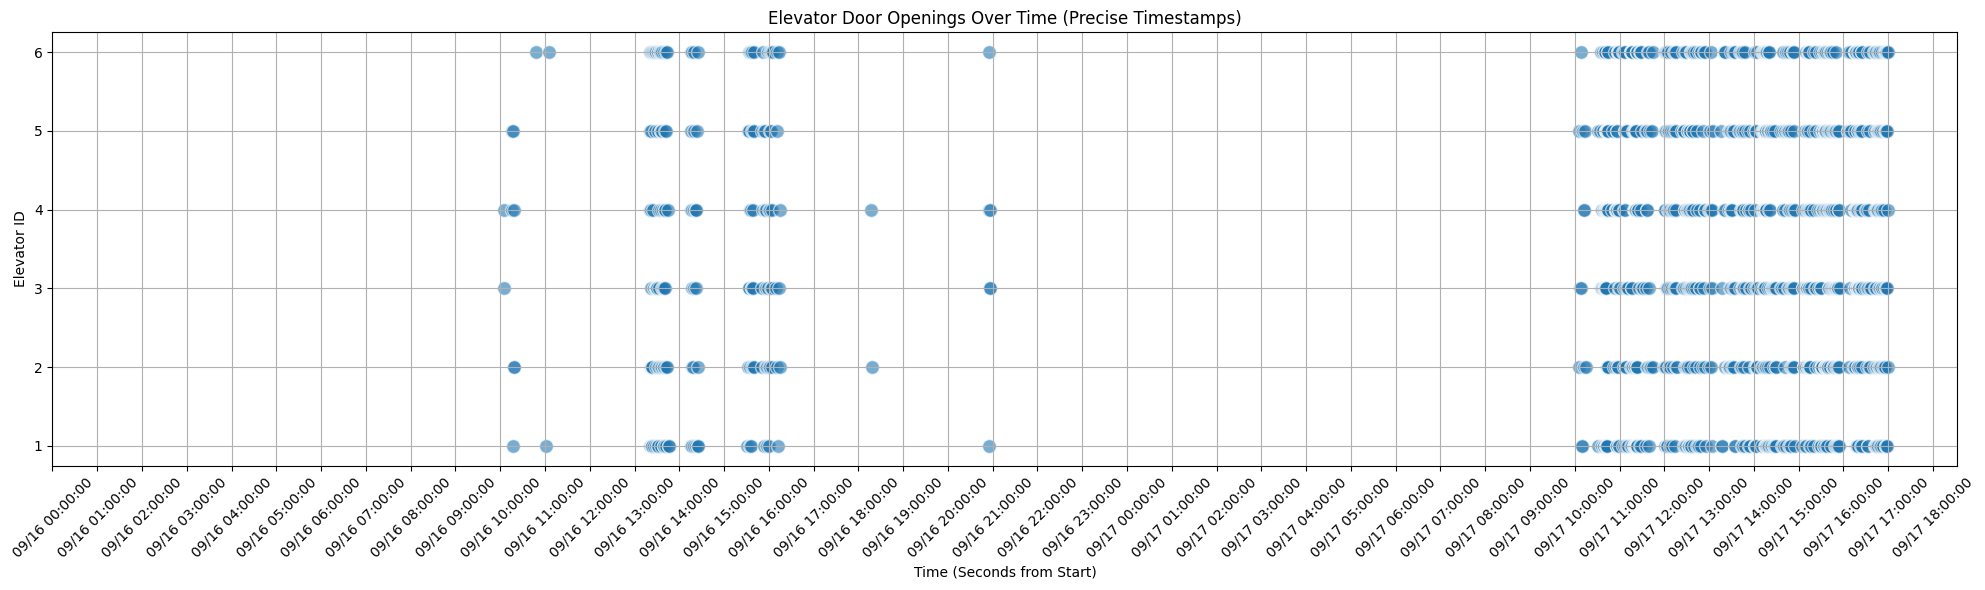

In [36]:
# Code for question 1:
import matplotlib.pyplot as plt
import pandas as pd

def make_plot():
    '''
    You will need to read the training data CSV file and do some processing first.
    '''
    # Read the CSV file
import matplotlib.pyplot as plt
import pandas as pd

def make_plot():
    '''
    You will need to read the training data CSV file and do some processing first.
    '''
    # Read the CSV file
    data = pd.read_csv('CDS_elevator_responses.csv')

    # Convert the "Timestamp" column to datetime
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])

    # Set the start of the first day to calculate seconds since this point
    start_time = data['Timestamp'].min().normalize()  # Start from the first day at midnight

    # Calculate seconds since the start of the first day for precise plotting
    data['Time in Seconds'] = (data['Timestamp'] - start_time).dt.total_seconds()

    # Plot the scatter plot with Time on x-axis (in seconds) and Elevator ID on y-axis
    plt.figure(figsize=(20, 6))  # Increased width for better spacing
    plt.scatter(data['Time in Seconds'], data['Elevator ID'], alpha=0.6, edgecolors='w', s=100)

    plt.title('Elevator Door Openings Over Time')
    plt.xlabel('Time (Seconds)')
    plt.ylabel('Elevator ID')
    
    # Customize x-axis ticks to show precise time with hours, minutes, and seconds
    tick_step = 3600  # Set a tick every hour (3600 seconds)
    ticks = range(0, int(data['Time in Seconds'].max()) + tick_step, tick_step)
    plt.xticks(ticks, [pd.to_datetime(start_time + pd.Timedelta(seconds=t)).strftime('%m/%d %H:%M:%S') for t in ticks], rotation=45)

    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

make_plot()

State observations here (briefly).

From the graph, it looks like elevators 3 and 4 arived most frequently on 9/16, as those two elevators have more points in the data. All elevators seems to come pretty often with equal likelihood on 9/17. It seems as if elevator 1 and 2 have the most gaps which would mean least arrivals, but the gap isn't very large.

**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [37]:
# Write any data processing code you need here

import pandas as pd
from datetime import datetime

# Load the CSV data
df = pd.read_csv('CDS_elevator_responses.csv')

# Convert timestamp column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M:%S')

# Initialize a list to store results
elevator_stats = []

# Process each elevator ID separately
for elevator_id, group in df.groupby('Elevator ID'):
    # Sort timestamps for each elevator
    group = group.sort_values(by='Timestamp')
    
    # Calculate time intervals between successive arrivals
    group['time_diff'] = group['Timestamp'].diff().dt.total_seconds()
    
    # Remove the first row which will have NaN for time_diff
    group = group.dropna(subset=['time_diff'])
    
    # Calculate the total data collection time based on unique email addresses
    unique_emails = group['Email Address'].nunique()
    total_collection_time = unique_emails * 5 * 60  # Each email counts for 5 minutes (in seconds)
    
    # Number of arrivals (including the first one)
    num_arrivals = len(group) + 1
        
    # Calculate average frequency (arrivals per second)
    avg_frequency = num_arrivals / total_collection_time
        
    # Append results for the current elevator
    elevator_stats.append({
        'Elevator ID': elevator_id,
        'total_collection_time': total_collection_time,
        'number_of_arrivals': num_arrivals,
        'average_frequency': avg_frequency
    })

result_df = pd.DataFrame(elevator_stats)
print(result_df)


   Elevator ID  total_collection_time  number_of_arrivals  average_frequency
0            1                  21600                 158           0.007315
1            2                  21600                 164           0.007593
2            3                  21600                 175           0.008102
3            4                  21600                 171           0.007917
4            5                  23100                 169           0.007316
5            6                  22200                 162           0.007297


**Answer:** It looks like the location I proposed is pretty reasonable, because each elevator has a very similar average frequency of arriving, which makes the center point a reasonable location.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Total data collection time (seconds) | 21600 | 21600 | 21600 | 21600 | 21600 |21600 |
| Number of arrivals | 158 | 164 | 175 | 171 | 169 |162 |
| Average frequency (arrivals per second) | 0.007315 | 0.007593 | 0.008102 | 0.007917 | 0.007316 | 0.007297 |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

**Answer:** To find the probability of the next elevator to come, we can take each elevator's frequency of arrival and divide it by the total frequency of arrival.

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 16.06% | 16.67% | 17.79% | 17.38% | 16.06% |16.02% |

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


**Answer:** In order to determine the optimal place to stand, the weighted averages of the positions of the elevators can be taken in order to find  the best place. This is done by taking the sum of the probability * x coordinate of each elevator, and then do the same for the y coordinates of each elevator in order to get the ideal (x, y) position to stand. This ends up being (3.06, 1.51).

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [38]:
# Your code here
import pandas as pd
import math

# Coordinates of the elevators
elevator_coordinates = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0)
}

def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def get_average_walk_distance(data, coordinate):
    '''
    data is a csv file containing the elevator data.
    coordinate is the point to wait at, e.g., (x, y).
    '''
    df = pd.read_csv('CDS_elevator_responses.csv')
    
    # Initialize a list to store distances
    distances = []
    
    # For each row, calculate the distance to the elevator coordinate
    for _, row in df.iterrows():
        elevator_id = row['Elevator ID']
        elevator_position = elevator_coordinates[elevator_id]
        
        # Calculate the distance from the waiting coordinate to the elevator
        distance = euclidean_distance(coordinate, elevator_position)
        distances.append(distance)
    
    # Calculate the average distance
    average_walk_distance = sum(distances) / len(distances) if distances else 0
    
    return average_walk_distance

avg_distance = get_average_walk_distance('CDS_elevator_responses.csv', (3, 1.5))
print("Average walking distance from original answer: ", avg_distance)
new_avg_distance = get_average_walk_distance('CDS_elevator_responses.csv', (3.06, 1.51))
print("Average walking distance from new answer: ", new_avg_distance)

Average walking distance from original answer:  2.1666666666666665
Average walking distance from new answer:  2.166047874028546


**Answer:** The average walking distance from the original was about 2.1667 rounded, and the average walking distance from the newly calculated distance was 2.1660. In the grand scheme of things, it's not that great of a difference for distance traveled, but it technically does decrease the walking distance to the next elevator that arrives.

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
| (3, 1.5) | 2.1667 |   2.1632 |
| (3.06, 1.51) | 2.1660 |   2.1627 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:** I did seem to find a good location to wait for the elevators, as the test data also had a slightly smaller average distance walked from the newly calculated coordinates than the original coordinates. This means that the new location is a more optimal location to stand to wait for the elevators. 

In [39]:
# Your code here
import pandas as pd
import math

# Coordinates of the elevators
elevator_coordinates = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0)
}

def euclidean_distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

def get_average_walk_distance(data, coordinate):
    '''
    data is a csv file containing the elevator data.
    coordinate is the point to wait at, e.g., (x, y).
    '''
    df = pd.read_csv('CDS_elevator_responses2.csv')
    
    # Initialize a list to store distances
    distances = []
    
    # For each row, calculate the distance to the elevator coordinate
    for _, row in df.iterrows():
        elevator_id = row['Elevator ID']
        elevator_position = elevator_coordinates[elevator_id]
        
        # Calculate the distance from the waiting coordinate to the elevator
        distance = euclidean_distance(coordinate, elevator_position)
        distances.append(distance)
    
    # Calculate the average distance
    average_walk_distance = sum(distances) / len(distances) if distances else 0
    
    return average_walk_distance

avg_distance = get_average_walk_distance('CDS_elevator_responses2.csv', (3, 1.5))
print("Average walking distance from original answer: ", avg_distance)
new_avg_distance = get_average_walk_distance('CDS_elevator_responses2.csv', (3.06, 1.51))
print("Average walking distance from new answer: ", new_avg_distance)

Average walking distance from original answer:  2.163157894736842
Average walking distance from new answer:  2.162666962997816
